In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [3]:
file_path = r"C:/Users/jugal/OneDrive/Documents/Ironhack_project/Project_ML/heart.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [52]:
# One-hot encoding categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [53]:
# Splitting dataset
target = df.drop(columns=['HeartDisease'])
feature = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(target,feature, test_size=0.2, random_state=42)

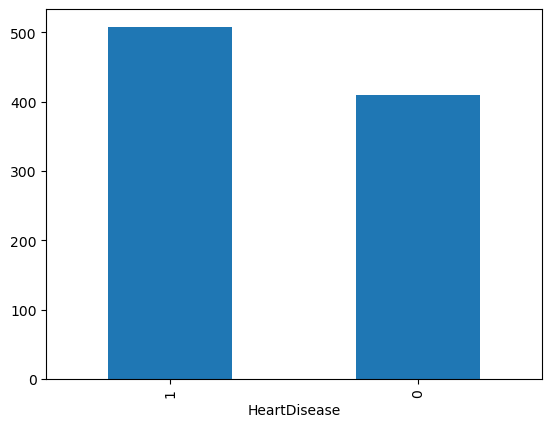

In [54]:
# Checking Data distribution 
number_of_heartdisease = df['HeartDisease'].value_counts()
number_of_heartdisease.plot(kind='bar')
plt.show()

### Based on teh above data, we can see that the data is imbalanced. We'll use the SMOTE to balane it before training the data

In [56]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

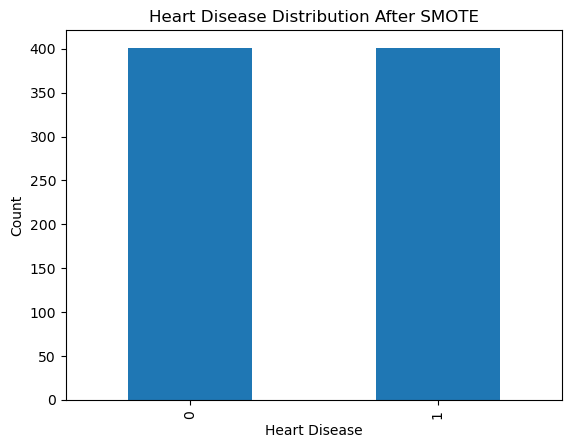

In [57]:
# Checking Data distribution 
# Checking Data distribution 
number_of_heartdisease = pd.Series(y_train).value_counts()
number_of_heartdisease.plot(kind='bar')
plt.title('Heart Disease Distribution After SMOTE')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

#### Since the data is balanced now, we'll train the data

In [59]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    specificity = TN / (TN + FP)
    accuracy = accuracy_score(y_test, pred)
    auc_score = roc_auc_score(y_test, pred)
    
    print(f"\n{model_name} Metrics:")
    print("Confusion Matrix:\n", cm)
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, Specificity: {specificity:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")
    print("Classification Report:\n", classification_report(y_test, pred))
    print(cm)
    print(auc_score)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend()
    plt.show()

In [61]:
# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, scale_pos_weight=2, random_state=42)
}


Logistic Regression Metrics:
Confusion Matrix:
 [[68  9]
 [18 89]]
TP: 89, TN: 68, FP: 9, FN: 18
Precision: 0.9082, Recall: 0.8318, Specificity: 0.8831, Accuracy: 0.8533, AUC: 0.8574
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

[[68  9]
 [18 89]]
0.8574462920257312


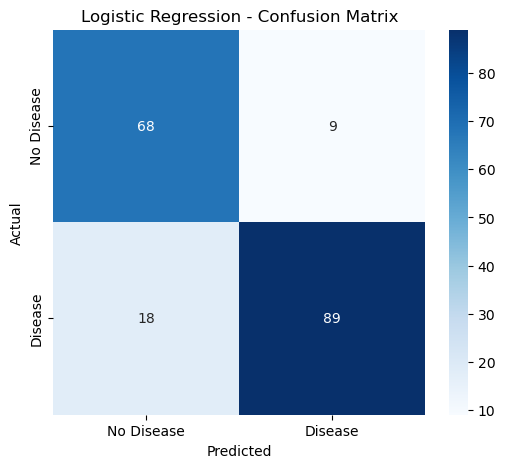

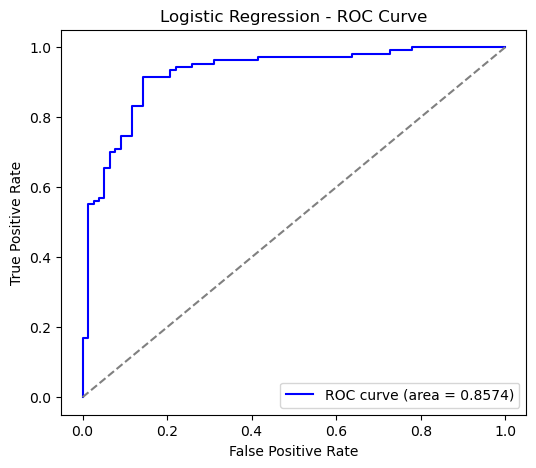


Random Forest Metrics:
Confusion Matrix:
 [[67 10]
 [13 94]]
TP: 94, TN: 67, FP: 10, FN: 13
Precision: 0.9038, Recall: 0.8785, Specificity: 0.8701, Accuracy: 0.8750, AUC: 0.8743
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

[[67 10]
 [13 94]]
0.8743172715135331


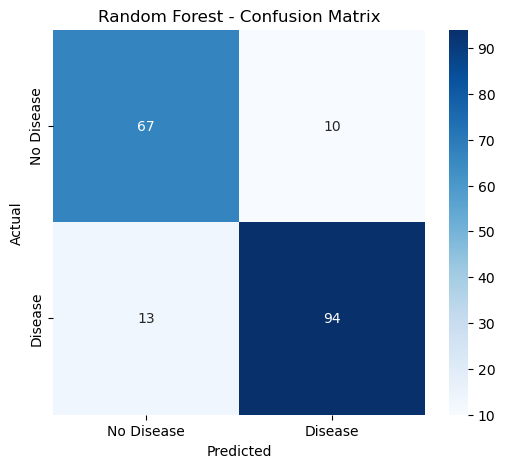

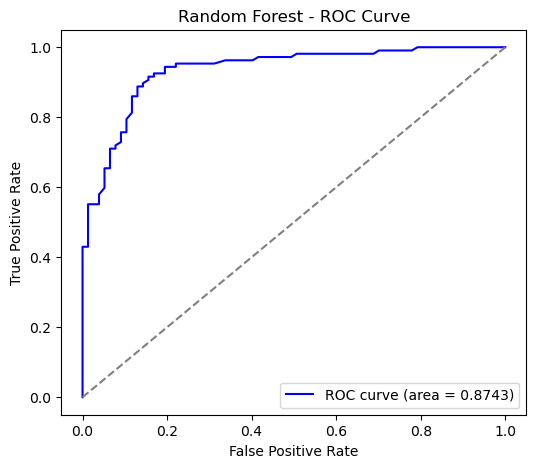


Gradient Boosting Metrics:
Confusion Matrix:
 [[68  9]
 [12 95]]
TP: 95, TN: 68, FP: 9, FN: 12
Precision: 0.9135, Recall: 0.8879, Specificity: 0.8831, Accuracy: 0.8859, AUC: 0.8855
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

[[68  9]
 [12 95]]
0.8854836752033014


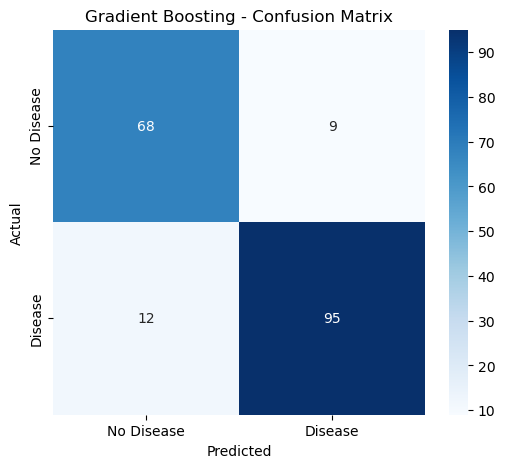

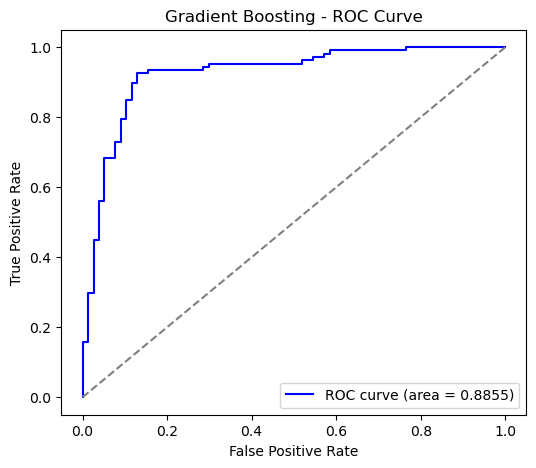


XGBoost Metrics:
Confusion Matrix:
 [[66 11]
 [10 97]]
TP: 97, TN: 66, FP: 11, FN: 10
Precision: 0.8981, Recall: 0.9065, Specificity: 0.8571, Accuracy: 0.8859, AUC: 0.8818
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

[[66 11]
 [10 97]]
0.8818424566088118


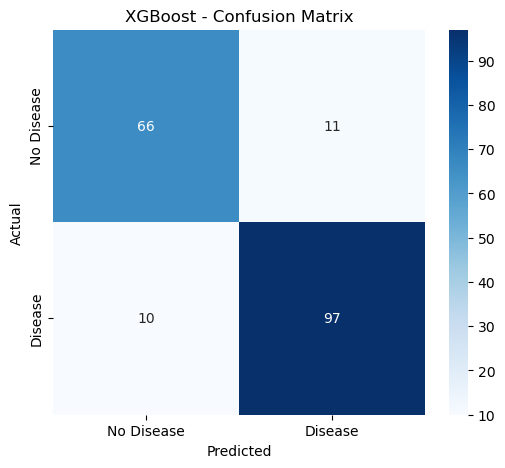

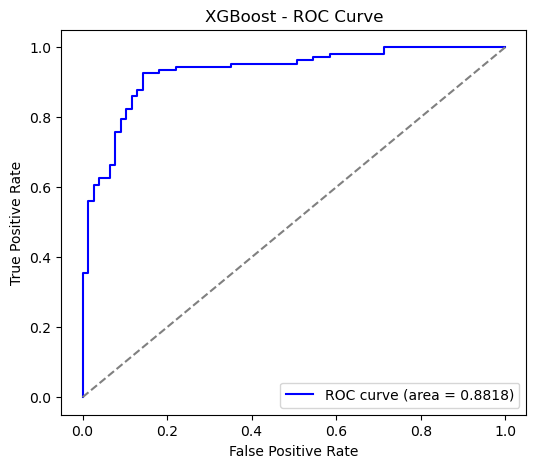

In [62]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    evaluate_model(model, X_test_scaled, y_test, name)

In [63]:
# Hyperparameter tuning with Grid Search for XGBoost

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'scale_pos_weight': [0.5, 1, 1.5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'scale_pos_weight': [1, 2, 3]
# }

In [64]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [0.5, 1, 1.5],
                         'subsample': [0.6, 0.8, 1]},
             scoring='f1_macro')


Best XGBoost (Grid Search) Metrics:
Confusion Matrix:
 [[69  8]
 [13 94]]
TP: 94, TN: 69, FP: 8, FN: 13
Precision: 0.9216, Recall: 0.8785, Specificity: 0.8961, Accuracy: 0.8859, AUC: 0.8873
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

[[69  8]
 [13 94]]
0.8873042845005461


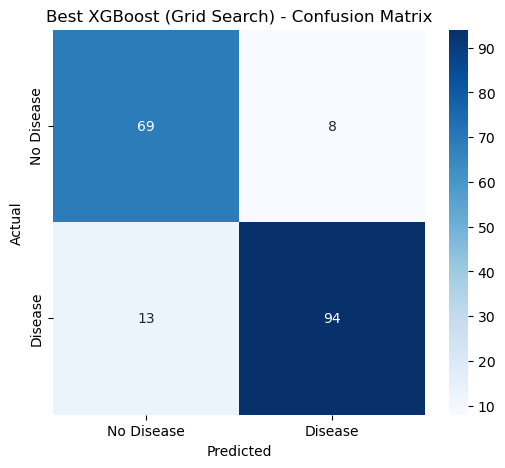

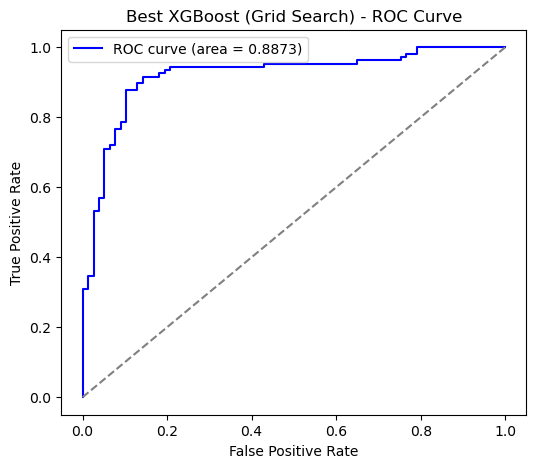

In [65]:
# Best model evaluation
best_xgb = grid_search.best_estimator_
evaluate_model(best_xgb, X_test_scaled, y_test, "Best XGBoost (Grid Search)")

In [85]:
# Save models
pickle.dump(best_xgb, open('best_xgb01.pkl', 'wb'))

In [87]:
print("Training set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))


Training set class distribution: [401 401]
Test set class distribution: [ 77 107]


In [93]:
y_pred_proba = best_xgb.predict_proba(X_test_scaled)
print("Prediction probabilities (first 10):", y_pred_proba[:10])


Prediction probabilities (first 10): [[0.96981543 0.03018454]
 [0.39022017 0.60977983]
 [0.07471639 0.9252836 ]
 [0.02278441 0.9772156 ]
 [0.9719261  0.0280739 ]
 [0.21964192 0.7803581 ]
 [0.04954731 0.9504527 ]
 [0.97775227 0.02224774]
 [0.33083606 0.66916394]
 [0.02245545 0.97754455]]


In [95]:
y_pred = best_xgb.predict(X_test_scaled)
print("Predictions:", y_pred[:20])


Predictions: [0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [103]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184


Confusion Matrix:
[[69  8]
 [13 94]]


In [105]:
print("Prediction distribution:", np.bincount(y_pred))


Prediction distribution: [ 82 102]


## Random Forest Hypertuning

In [112]:
# Defining the hyperarameter
param_space = {
    'n_estimators': np.arange(100, 1000, step=100),
    'max_depth': [None] + list(range(5, 20)),
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'min_samples_split': np.arange(2, 10, step=2),
    'min_samples_leaf': np.arange(1, 5),
    'criterion': ['gini', 'entropy']
}


In [114]:
rf_model  = RandomForestClassifier(random_state = 42)

In [116]:
# Defining n_jobs
n_jobs = -1
# Performing random search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_space,
    n_iter=50,
    cv=5,
    n_jobs= n_jobs,
    random_state=42, 
    error_score='raise' # Set to raise for debugging
)


In [ ]:
# Fitting the random serach to our data
try:
    random_search.fit(X_train_scaled, y_train)
except Exceptino as e:
    print(f'An error occurred {e}')


In [119]:
best_params = random_search.best_params_
rf_best_model = random_search.best_estimator_
print("\nRandom Forest Randomized Search Best Parameters:", best_params)


Random Forest Randomized Search Best Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 19, 'criterion': 'gini'}



Random Forest (Random Search) Metrics:
Confusion Matrix:
 [[69  8]
 [13 94]]
TP: 94, TN: 69, FP: 8, FN: 13
Precision: 0.9216, Recall: 0.8785, Specificity: 0.8961, Accuracy: 0.8859, AUC: 0.8873
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

[[69  8]
 [13 94]]
0.8873042845005461


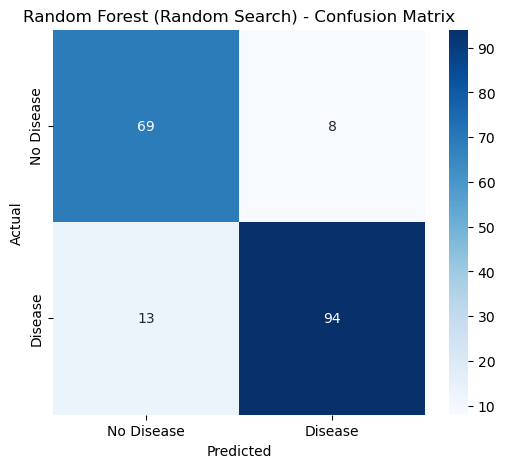

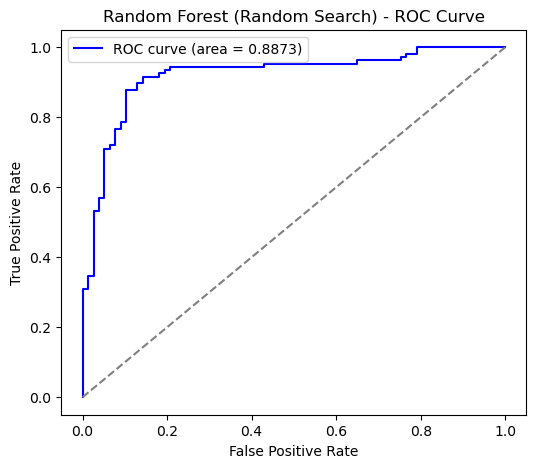

In [124]:
evaluate_model(best_xgb, X_test_scaled, y_test, "Random Forest (Random Search)")

In [126]:
# Save models
pickle.dump(rf_best_model, open('rf_best_model.pkl', 'wb'))